In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


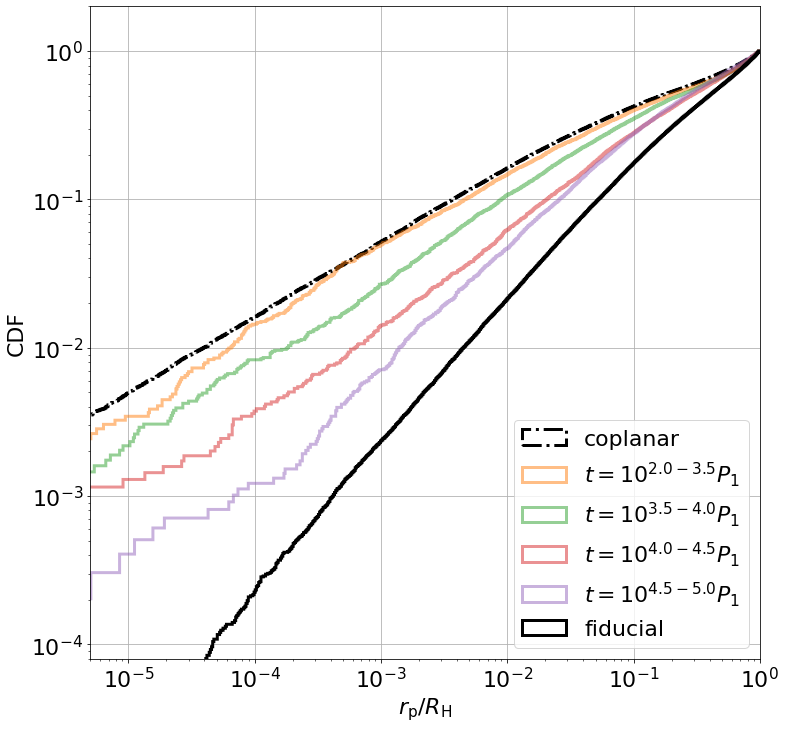

In [5]:
## 
##  Read the data for canonical runs
##

RH = (2e-5/3.)**(1./3.)

can_CE0 = np.load('d:/_work/BBH-data_use/_data/can_CE0-2000.npy')
can5_CE0 = np.load('d:/_work/BBH-data_use/can-5_CE0.npy')
canf_CE0 = np.load('d:/_work/BBH-data_use/can-flat_CE0.npy')





##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$r_{\rm p}/R_{\rm H}$')
axs.set_ylabel(r'CDF')

axs.set_xlim([5e-6,1e-0])
axs.set_ylim([0.8e-4,2])

axs.set_xscale('log')
axs.set_yscale('log')

# parameters of the plot

bin_use = 10**np.linspace(-9,0.1,1001)
aluse = .5
lw = 3

eta = canf_CE0[:,3] * (1-canf_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         label=r'coplanar',edgecolor='k',histtype='step',ls='-.')

# plot the distribution of rp

t_range = np.array([1e2,3e3,1e4,3e4,1e5]) #10.**np.linspace(2.0,5,4)#np.array([1,1e2,1e3,1e4,1e5,1e5])
for i in range(len(t_range)-1):
    t0 = t_range[i]
    tf = t_range[i+1]
    it = (can5_CE0[:,0]>t0) * (can5_CE0[:,0]<tf)
    eta = can5_CE0[it,3] * (1-can5_CE0[it,4]) / RH
    Nuse = len(eta)
    axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
             label=r'$t=10^{%2.1f-%2.1f}P_1$' %(np.log10(t0),np.log10(tf)),
             alpha=aluse,histtype='step') 





eta = can_CE0[:,3] * (1-can_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         label=r'fiducial',edgecolor='k',histtype='step')

# plot the analytical distribution
'''
x2 = bin_use
Nx2 = np.sqrt(x2)
Nx2 = Nx2/Nx2[-1]*2
#axs.plot(x2, Nx2,'b',alpha=0.3, linewidth=20)#,label=r'$\propto \sqrt{r_{\rm p}}$ (uniform $\ell$ )')
axs.plot(x2, Nx2,'k-.',alpha=1., linewidth=lw)

x1 = bin_use
Nx1 = x1
Nx1 = Nx1/Nx1[-1]*2
#axs.plot(x1, Nx1,'g',alpha=0.3, linewidth=20)#,label=r'$\propto r_{\rm p}$ (linear $\ell$ )')
axs.plot(x1, Nx1,'k--',alpha=1., linewidth=lw)
'''
##  Save the figure
axs.legend(loc=4,ncol=1)
axs.grid()
axs.set_axisbelow(True)

plt.savefig('./pics/pics-CDF-rp-inc-vs-time.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-CDF-rp-inc-vs-time.png',bbox_inches='tight',transparent=True)
